### Multiple Linear Regression - Economics Dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
df=pd.read_csv("economic_index.csv")

In [4]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


#### To remove Unneccessary Colums:
df_index=df.drop(columns=["Unnamed: 0",....],axis=1,inplace=True)

In [10]:
df_index=df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [11]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [12]:
##Check Null Value
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

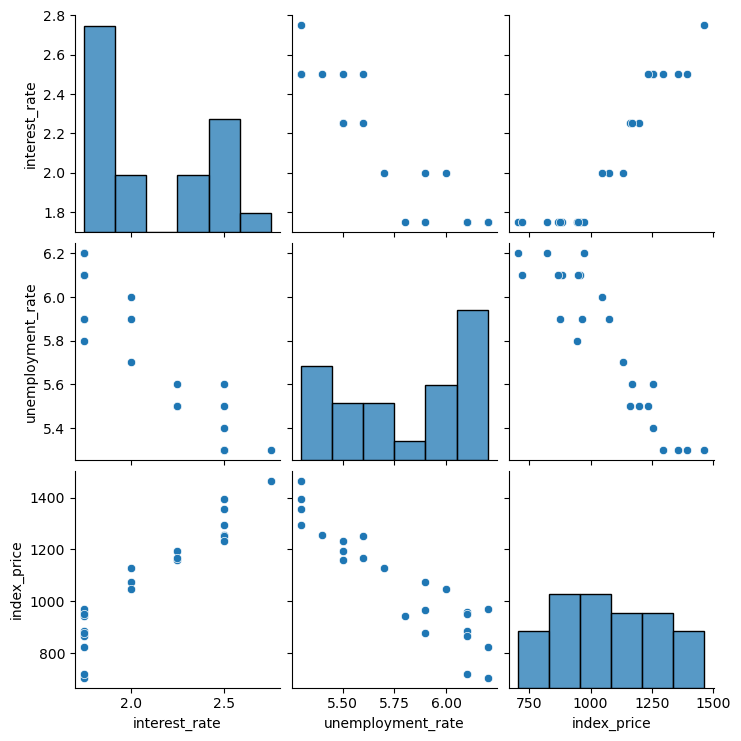

In [52]:
##Visualization
import seaborn as sns
sns.pairplot(df)
plt.show()      ##To find the correlation between each other.

In [14]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


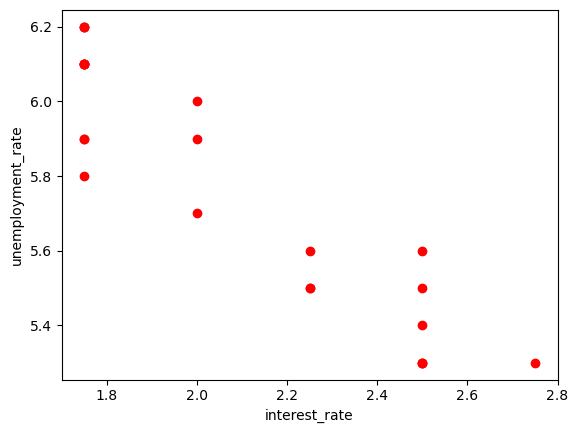

In [15]:
##Visualize Datapoints more Closely
plt.scatter(df['interest_rate'],df['unemployment_rate'],color="red")
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate") 
plt.show()

#### Dependent and Independent Split

In [16]:
##Independent Dataset
X=df[['interest_rate','unemployment_rate']]
X.head() 

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


#### Alternative way to create Independent Feature:
X=df.iloc[:,:-1]

In [17]:
##Dependent Dataset
Y=df['index_price']
Y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

#### Alternative way to create dependent feature:
Y=df.iloc[:,-1]

In [18]:
##Spliting Dataset into Testing and Training
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [19]:
X_train.head()

,interest_rate,unemployment_rate
13,1.75,5.9
1,2.50,5.3
21,1.75,6.2
5,2.50,5.6
2,2.50,5.3


In [20]:
X_test.head()

,interest_rate,unemployment_rate
8,2.25,5.5
16,1.75,6.2
0,2.75,5.3
18,1.75,6.1
11,2.00,5.9


In [21]:
Y_train.head()

13     965
1     1394
21     822
5     1254
2     1357
Name: index_price, dtype: int64

In [22]:
Y_test.head()

8     1159
16     971
0     1464
18     884
11    1075
Name: index_price, dtype: int64

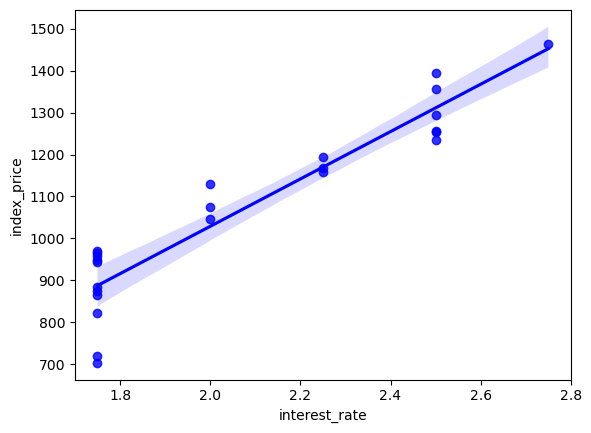

In [23]:
sns.regplot(x='interest_rate', y='index_price', data=df,color="blue")
plt.show()

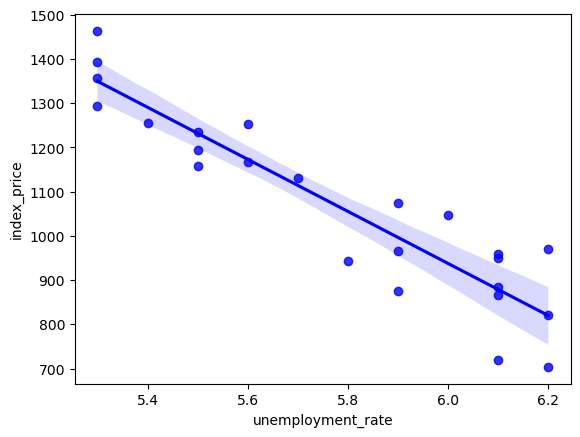

In [24]:
sns.regplot(x='unemployment_rate', y='index_price', data=df,color="blue")
plt.show()

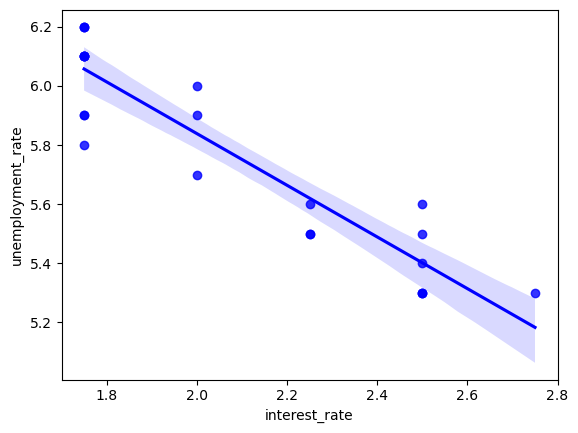

In [25]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df,color="blue")
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test) 

In [28]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [29]:
X_test

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

In [30]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [31]:
regression.fit(X_train,Y_train)

LinearRegression()

In [33]:
## Cross Validation
from sklearn.model_selection import cross_val_score
validation=cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)

In [34]:
validation

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [37]:
np.mean(validation)

np.float64(-5914.828180162396)

In [39]:
##Prediction
Y_pred=regression.predict(X_test)

In [40]:
Y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [41]:
##Performance Metrices
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
mae=mean_absolute_error(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
rmse=root_mean_squared_error(Y_test,Y_pred)
print(mae)
print(mse) 
print(rmse)

59.93578152323556
5793.76288771258
76.11677139574813


In [42]:
## R Squared
from sklearn.metrics import r2_score
score=r2_score(Y_test,Y_pred)
print(score)

## Adjusted R Squared
print(1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))

0.8278978091457142
0.713163015242857


#### Assumptions

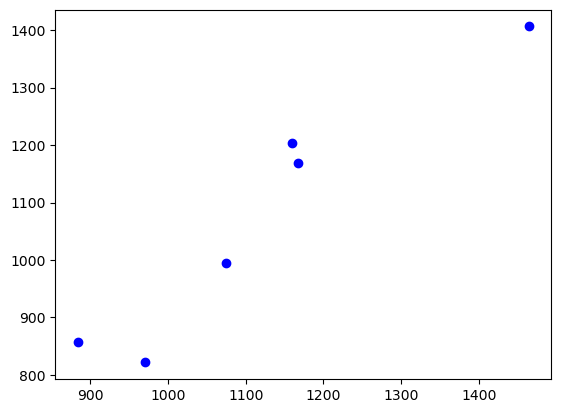

In [51]:
plt.scatter(Y_test,Y_pred,color='blue')
plt.show()      ##can be seen that it shows some linear property. 

In [44]:
residuals=Y_test-Y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


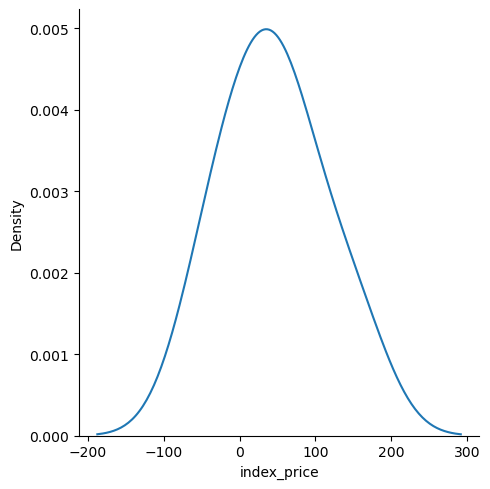

In [50]:
##Plotting residuals
sns.displot(residuals,kind='kde')
plt.show()      ##More Definite the Kernel Density Estimator the better the model is. 

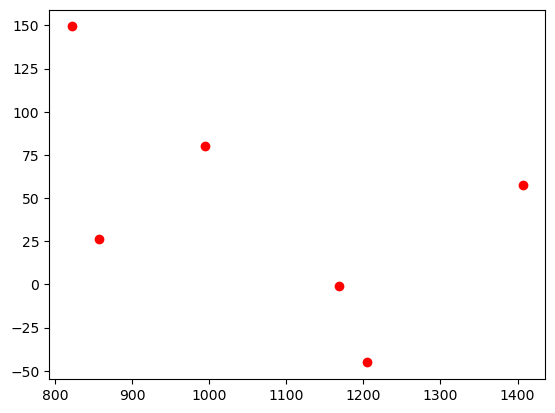

In [49]:
##Plotting with respect to prediction and residuals
plt.scatter(Y_pred,residuals,color='red')
plt.show()          ##if plot is scatter and not following any kind of pattern then its Good/Positive. 

In [53]:
## OLS Linear Regression
import statsmodels.api as sm

In [54]:
model=sm.OLS(Y_train,X_train).fit()

In [56]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 20 Feb 2026   Prob (F-statistic):                       0.754
Time:                        21:17:59   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\pprav\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [57]:
print(regression.coef_)

[  88.27275507 -116.25716066]
